In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from helpers.helper_functions import *

# Handling text 2 exercise
[Handling text exercisses ADApted drom ADA 2018 final exam]

The Sheldon Cooper we all know and love (OK, some of us might not know him, and some might not love him) from the TV series "The Big Bang Theory" has gotten into an argument with Leonard from the same TV show. Sheldon insists that he knows the show better than anyone, and keeps making various claims about the show, which neither of them know how to prove or disprove. The two of them have reached out to you ladies and gentlemen, as data scientists, to help them. You will be given the full script of the series, with information on the episode, the scene, the person saying each dialogue line, and the dialogue lines themselves.

Leonard has challenged several of Sheldon's claims about the show, and throughout this exam you will see some of those and you will get to prove or disprove them, but remember: sometimes, we can neither prove a claim, nor disprove it!

## Task A: Picking up the shovel

**Note: You will use the data you preprocess in this task in all the subsequent ones.**

Our friends' argument concerns the entire show. We have given you a file in the `data/` folder that contains the script of every single episode. New episodes are indicated by '>>', new scenes by '>', and the rest of the lines are dialogue lines. Some lines are said by multiple people (for example, lines indicated by 'All' or 'Together'); **you must discard these lines**, for the sake of simplicity. However, you do not need to do it for Q1 in this task -- you'll take care of it when you solve Q2.

**Q1**. Your first task is to extract all lines of dialogue in each scene and episode, creating a dataframe where each row has the episode and scene where a dialogue line was said, the character who said it, and the line itself. You do not need to extract the proper name of the episode (e.g. episode 1 can appear as "Series 01 Episode 01 - Pilot Episode", and doesn't need to appear as "Pilot Episode"). Then, answer the following question: In total, how many scenes are there in each season? We're not asking about unique scenes; the same location appearing in two episodes counts as two scenes. You can use a Pandas dataframe with a season column and a scene count column as the response.

**Note: The data refers to seasons as "series".**

In [49]:
import os
import codecs
import spacy

In [50]:
# your code goes here
corpus_root = 'data/'
nlp = spacy.load('en_core_web_sm')

KeyboardInterrupt: 

In [ ]:
scripts = list()

for book_file in os.listdir(corpus_root):
    if ".txt" in book_file:
        print(book_file)
        with codecs.open(os.path.join(corpus_root,book_file),encoding="utf8") as f:
            scripts.append(f.read())

all_scripts.txt


In [ ]:
books = [" ".join(s.split()) for s in scripts]

In [ ]:
episode_indicator = '>>'
scene_indicator = '>'

In [ ]:
episode = [" ".join(s.split()) for s in scripts]
episodes = scripts[0].split(episode_indicator)


In [ ]:
print(episodes[22])


 Series 02 Episode 05 – The Euclid Alternative
> The apartment. Leonard enters, drops his keys in the bowl by the door, then collapses onto the settee. Sheldon enters from the bedroom area.
Sheldon: Good morning, Leonard.
Leonard: Uh-huh.
Sheldon: Yeah, we’re going to have to stop by Pottery Barn on the way to work, I bought these Star Wars sheets but they turned out to be much too stimulating to be compatible with a good night’s sleep. I don’t like the way Darth Vader stares at me.
Leonard: I’m not going to work.
Sheldon: Oh, just because your career’s been stagnant for a few years, that’s no reason to give up.
Leonard: Sheldon, I was up all night using the new free-electron laser for my X-ray diffraction experiment.
Sheldon: Did the laser accidentally burn out your retinas?
Leonard: No.
Sheldon: Then you can drive. Let’s go.
Leonard: Didn’t I tell you I’d be working nights, and that you’d have to make other arrangements.
Sheldon: You did.
Leonard: And?
Sheldon: I didn’t. Let’s go.
Le

In [ ]:
scenes =[episodes[i].split(scene_indicator) for i in range(len(episodes))]
print(scenes[45])

[' Series 03 Episode 05 – The Creepy Candy Coating\xa0Corollary\r\n', ' The apartment.\r\nHoward: All right, Raj has played his phantom warlord card, and I am going to back him up with my strangling vines. Choke on that, sucka.\r\nLeonard: Okay, well, then I’ll just cut your vines with my ruby sword. That’s right, I did it. I cut ’em.\r\nPenny: Um, I have a question.\r\nLeonard: Warlord beats troll, troll beats elf, elf beats water sprite, and basically everything beats enchanted bunny.\r\nHoward: Unless you have the carrot power.\r\nPenny: Okay, I’ve got another question. When does this get fun?\r\nHoward: Are we going to talk or are we going to play Mystic Warlords of Ka-ah?\r\nLeonard: Just play a potion card.\r\nPenny: Which one?\r\nSheldon: It doesn’t matter. You can’t possibly win.\r\nLeonard: Sheldon, don’t ruin the game.\r\nPenny: How could he ruin the game?\r\nSheldon: Given the cards that have already been played, Penny can only be holding necromancer potions, which are only 

In [ ]:
scenes_df = pd.DataFrame(scenes)
print(scenes_df.shape)
print(scenes_df.head())

(232, 22)
                                                  0   \
0                                                      
1           Series 01 Episode 01 – Pilot Episode\r\n   
2   Series 01 Episode 02 – The Big Bran Hypothesi...   
3   Series 01 Episode 03 – The Fuzzy Boots Coroll...   
4   Series 01 Episode 04 – The Luminous Fish Effe...   

                                                  1   \
0                                               None   
1   A corridor at a sperm bank.\r\nSheldon: So if...   
2   Sheldon and Leonard’s apartment. Sheldon, Leo...   
3   Sheldon and Leonard’s apartment. Sheldon, Leo...   
4   Sheldon and Leonard’s apartment.\r\nSheldon: ...   

                                                  2   \
0                                               None   
1   The stairs of the apartment building.\r\nShel...   
2   Ground floor hallway of the apartment buildin...   
3   The same.\r\nSheldon: Wooh, I’m all sweaty, a...   
4   The department party. Sheldon, R

In [ ]:
scenes_df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Series 01 Episode 01 – Pilot Episode\r\n,A corridor at a sperm bank.\r\nSheldon: So if...,The stairs of the apartment building.\r\nShel...,Sheldon and Leonard’s apartment.\r\nLeonard: ...,"In the bathroom.\r\nLeonard: Uh, there it goe...","Leonard and Sheldon, Inside Leonard’s car\r\n...","Back at the apartment.\r\nPenny: So, you guys...",Outside Penny’s old apartment building.\r\nLe...,Outside Penny’s ex-boyfriend’s apartment.\r\n...,Outside the apartment building. Leonard and S...,...,All five in Leonard’s car.\r\nLeonard: Is Tha...,None,None,None,None,None,None,None,None,None
2,Series 01 Episode 02 – The Big Bran Hypothesi...,"Sheldon and Leonard’s apartment. Sheldon, Leo...",Ground floor hallway of the apartment buildin...,Inside Penny’s apartment. They are laying the...,"Leonard’s bedroom, he is asleep. Sound of doo...",The living room. Leonard enters carrying a li...,"Penny’s apartment, penny is sleeping, Sheldon...","Sheldon and Leonard’s living room, morning. S...","The stairwell. Raj is coming up the stairs, h...",Sheldon and Leonard’s living room. Howard is ...,...,None,None,None,None,None,None,None,None,None,None
3,Series 01 Episode 03 – The Fuzzy Boots Coroll...,"Sheldon and Leonard’s apartment. Sheldon, Leo...","The same.\r\nSheldon: Wooh, I’m all sweaty, a...",Howard and Lesley’s lab.\r\nLeonard: Hello Le...,"Sheldon and Leonard’s flat. Sheldon, Raj and ...",A salsa class. The four guys and a random fat...,"The flat, Leonard is entering, singing to him...",The hallway. Leonard knocks on Penny’s door.\...,Sheldon and Leonard’s apartment. Leonard ente...,A restaurant.\r\nPenny: So are the rest of th...,...,None,None,None,None,None,None,None,None,None,None
4,Series 01 Episode 04 – The Luminous Fish Effe...,Sheldon and Leonard’s apartment.\r\nSheldon: ...,"The department party. Sheldon, Raj and Leonar...",The stairwell of the apartment building. Shel...,"The apartment, Sheldon is in the kitchen cook...",Penny’s car\r\nPenny: How come you didn’t go ...,The supermarket.\r\nSheldon: This is great. L...,On the stairwell of the apartment building.\r...,"The apartment, Sheldon has several bowls cont...",The stairwell of the apartment building.\r\nL...,...,The kitchen\r\nMrs Cooper: Problem solved.\r\...,Dr Gablehouser’s office\r\nMrs Cooper: Excuse...,Sheldon’s bedroom. Mrs Cooper is tucking him ...,None,None,None,None,None,None,None


In [ ]:
seasons_splitting = [f'Series {0}{i}' for i in range(1, 9)]
print(seasons_splitting)
scenes_df.groupby(seasons_splitting)



['Series 01', 'Series 02', 'Series 03', 'Series 04', 'Series 05', 'Series 06', 'Series 07', 'Series 08']


KeyError: 'Series 01'

In [52]:
'''so what we learn: look at the text, use startswith, readlines, split'''
Season = ""
Episode = ""
Scene = ""
data = []
with open('data/all_scripts.txt') as f:
    for line in f.readlines():
        line = line[:-1]
        if line.startswith('>> '):
            Episode = line[3:]
            Season = int(line[10:12])
            continue
        if line.startswith('> '):
            Scene = line[2:]
            continue
        character, line = line.split(": ", 1)
        data.append([Season, Episode, Scene, character, line])

lines = pd.DataFrame(data, columns=["Season", "Episode", "Scene", "Character", "Line"])

In [53]:
display(lines)

,Season,Episode,Scene,Character,Line
0,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,So if a photon is directed through a plane wit...
1,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,"Agreed, what’s your point?"
2,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,"There’s no point, I just think it’s a good ide..."
3,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,Excuse me?
4,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Receptionist,Hang on.
...,...,...,...,...,...
51287,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Ramona,"Mmm. No big deal, I enjoy spending time with you."
51288,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,"And I with you. Question, are you seeking a ro..."
51289,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Ramona,What if I were?
51290,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,"Well, that would raise a number of problems. W..."


In [54]:
a = lines.groupby(["Season", "Episode", "Scene"])
a = a.count()
display(a)
a = a.reset_index()
a = a.groupby("Season")
display(a)
a = a.count()[["Scene"]] #wenta 3amel groupby season, fa lamma te3mel el etnein crochets hatla2y elindex howa elgroupby, wel column howa "Scene"
display(a)

Character  \
Season Episode                                            Scene                                                
1      Series 01 Episode 01 – Pilot Episode               A corridor at a sperm bank.                     30   
                                                          All five in Leonard’s car.                      12   
                                                          Back at the apartment.                           5   
                                                          In the bathroom.                                11   
                                                          Inside Sheldon and Leonard’s apartment.         18   
...                                                                                                      ...   
10     Series 10 Episode 24 – The Long Distance Disson... The apartment.                                  61   
                                                          The cafeteria.                                  44   
                                                          The comic book store.                           17   
                                                          The same, later.                                24   
                                                          The street.                                      3   

                                                                                                   Line  
Season Episode                                            Scene                                          
1      Series 01 Episode 01 – Pilot Episode               A corridor at a sperm bank.                30  
                                                          All five in Leonard’s car.                 12  
                                                          Back at the apartment.                      5  
                                                          In the bathroom.                           11  
                                                          Inside Sheldon and Leonard’s apartment.    18  
...                                                                                                 ...  
10     Series 10 Episode 24 – The Long Distance Disson... The apartment.                             61  
                                                          The cafeteria.                             44  
                                                          The comic book store.                      17  
                                                          The same, later.                           24  
                                                          The street.                                 3  

[1947 rows x 2 columns]

,Scene
Season,
1,157
2,205
3,193
4,219
5,198
6,211
7,207
8,191
9,177


In [55]:
a = lines.groupby(["Season", "Episode", "Scene"]).count().reset_index().groupby("Season").count()[["Scene"]]
a.head(15)

,Scene
Season,
1,157
2,205
3,193
4,219
5,198
6,211
7,207
8,191
9,177


In [56]:
a['Scene'].count()

10

**Q2**. Now, let's define two sets of characters: all the characters, and recurrent characters. Recurrent characters are those who appear in more than one episode. For the subsequent sections, you will need to have a list of recurrent characters. Assume that there are no two _named characters_ (i.e. characters who have actual names and aren't referred to generically as "little girl", "grumpy grandpa", etc.) with the same name, i.e. there are no two Sheldons, etc. Generate a list of recurrent characters who have more than 90 dialogue lines in total, and then take a look at the list you have. If you've done this correctly, you should have a list of 20 names. However, one of these is clearly not a recurrent character. Manually remove that one, and print out your list of recurrent characters. To remove that character, pay attention to the _named character_ assumption we gave you earlier on. **For all the subsequent questions, you must only keep the dialogue lines said by the recurrent characters in your list.**

In [57]:
# your code goes here
characters = lines.groupby(['Character']).count()[['Line']] #yeb2a etnein crochets 3shan ta5od el column dah bas f df gdyd fyh elCharacter ka index, w count elines ka column,
#w crochet wa7ed 3shan tefdal f nafs eldf, bas sa3etha msh hate3raf ta5od menno subset 3ala 7asab cindition mo3ayyan f df gedyd!!!
#.filter(lines[lines['Line'].count() > 90])$
display(characters)
#characters = characters.groupby('Character')
recurrent_characters = characters[characters['Line'] > 90]

recurrent_characters = recurrent_characters.drop(index = 'Man') #lazem t reassign!!
display(recurrent_characters)
recurrent_characters.shape

,Line
Character,
Abby,4
Actress,5
Adam,19
Air Force Officer,6
Alex,63
...,...
Woman,25
Woman on TV,5
Wyatt,42


,Line
Character,
Amy,3472
Arthur,130
Bernadette,2690
Bert,95
Beverley,162
Emily,164
Howard,5872
Kripke,106
Leonard,9829


(19, 1)

In [58]:
'''DataFrame.isin(values): returns boolean mask of whether the df is in the values. values has the type: iterable, Series, DataFrame or dict'''
recurrent_characters_lines = lines[lines['Character'].isin(recurrent_characters.index)]
# bardo yenfa3 recurrent_characters_lines = lines[lines['Character'].isin(recurrent_characters.index.to_list())]
display(recurrent_characters_lines)

,Season,Episode,Scene,Character,Line
0,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,So if a photon is directed through a plane wit...
1,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,"Agreed, what’s your point?"
2,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,"There’s no point, I just think it’s a good ide..."
3,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,Excuse me?
5,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,"One across is Aegean, eight down is Nabakov, t..."
...,...,...,...,...,...
51284,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,"Uh, breakfast yes, lunch no. I did have a coug..."
51286,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,How thoughtful. Thank you.
51288,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,"And I with you. Question, are you seeking a ro..."
51290,10,Series 10 Episode 24 – The Long Distance Disso...,Sheldon’s office.,Sheldon,"Well, that would raise a number of problems. W..."


## Task B: Read the scripts carefully

### Part 1: Don't put the shovel down just yet

**Q3**. From each dialogue line, replace punctuation marks (listed in the EXCLUDE_CHARS variable provided in `helpers/helper_functions.py`) with whitespaces, and lowercase all the text. **Do not remove any stopwords, leave them be for all the questions in this task.**

In [59]:
# your code goes here
import sys
helpers_path = sys.path.append('helpers/helper_functions.py')
from helpers import helper_functions
print(helper_functions.EXCLUDE_CHARS)

{'%', '=', '|', '#', '[', '<', '?', '*', '>', '{', "'", '}', '~', '\\', '^', '/', '"', '_', '$', '(', ')', '+', '`', ':', ';', ',', '&', ']', '@', '.', '’', '!', '-'}


In [60]:
count = 0
for char in recurrent_characters_lines['Line']:
    if char in (helper_functions.EXCLUDE_CHARS):
        count+=1
        char == ' '
    char = str.lower(char)
print(count)

0


In [71]:
def clean_line(line):
    for char in EXCLUDE_CHARS:
        line = line.replace(char, ' ')

    return line.lower()
recurrent_characters_lines['Line'] = recurrent_characters_lines['Line'].apply(clean_line) #.apply enta bet reference esm elfunction msh bete3mellaha call, ya3ny mat7ottesh 3aleiha parenthesis!!!

C:\Users\Seif\AppData\Local\Temp\ipykernel_14404\71016303.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recurrent_characters_lines['Line'] = recurrent_characters_lines['Line'].apply(clean_line)


**Q4**. For each term, calculate its "corpus frequency", i.e. its number of occurrences in the entire series. Visualize the distribution of corpus frequency using a histogram. Explain your observations. What are the appropriate x and y scales for this plot?

In [102]:
# your code goes here
from gensim.corpora import Dictionary
doc = recurrent_characters_lines['Line']
#must tokenize to buiild the BoW
lines_tokens = [[text for text in doc.split()] for doc in doc]
#build the BoW
dictionary = Dictionary(lines_tokens)
#get the number of occurences in a dict
dictionary = dictionary.token2id
print(dictionary)


{'a': 0, 'after': 1, 'and': 2, 'before': 3, 'both': 4, 'but': 5, 'directed': 6, 'either': 7, 'go': 8, 'gone': 9, 'have': 10, 'hits': 11, 'however': 12, 'if': 13, 'in': 14, 'is': 15, 'it': 16, 'its': 17, 'left': 18, 'not': 19, 'observed': 20, 'photon': 21, 'plane': 22, 's': 23, 'slit': 24, 'slits': 25, 'so': 26, 'target': 27, 'the': 28, 'through': 29, 'two': 30, 'unobserved': 31, 'will': 32, 'with': 33, 'agreed': 34, 'point': 35, 'what': 36, 'your': 37, 'for': 38, 'good': 39, 'i': 40, 'idea': 41, 'just': 42, 'no': 43, 'shirt': 44, 'tee': 45, 'there': 46, 'think': 47, 'excuse': 48, 'me': 49, 'across': 50, 'aegean': 51, 'au': 52, 'capital': 53, 'doc': 54, 'down': 55, 'eight': 56, 'finger…': 57, 'fourteen': 58, 'haiti': 59, 'is…': 60, 'makes': 61, 'mcm': 62, 'move': 63, 'nabakov': 64, 'one': 65, 'papa': 66, 'phylum': 67, 'port': 68, 'prince': 69, 'see': 70, 'six': 71, 'that': 72, 'twenty': 73, 'which': 74, 'bank': 75, 'high': 76, 'iq': 77, 'sperm': 78, 'this': 79, 'um': 80, 'yes': 81, 'pla

In [90]:
#trsfrm it into a df
BoW_df = pd.DataFrame.from_dict(dictionary, orient = 'index', columns=['Occurrences'])#orient = 'index' 3shan elkeys yeb2o elrows #orient = 'column' law elkeys elmafroud yekouno columns
#BoW_df.set_index(['Word'])
BoW_df.head()

,Occurrences
a,0
after,1
and,2
before,3
both,4


        Occurrences
count  21102.000000
mean   10550.500000
std     6091.767026
min        0.000000
25%     5275.250000
50%    10550.500000
75%    15825.750000
max    21101.000000


<AxesSubplot:xlabel='Frequency'>

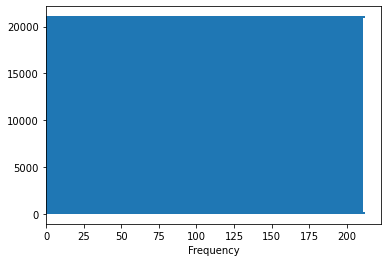

In [97]:
print(BoW_df.describe())
#fig, ax = plt.subplots(figsize=(7, 4))
#ax.hist(BoW_df['Occurrences'], labels = 'Word Occurrences')
BoW_df['Occurrences'].plot.hist(orientation = 'horizontal', bins = 100)

### Part 2: Talkativity
**Q5**. For each of the recurrent characters, calculate their total number of words uttered across all episodes. Based on this, who seems to be the most talkative character?

In [109]:
# your code goes here
recurrent_characters_lines.groupby('Character')[['Line']].count().sort_values(by = 'Line', ascending=False)

,Line
Character,
Sheldon,11689
Leonard,9829
Penny,7677
Howard,5872
Raj,4779
Amy,3472
Bernadette,2690
Stuart,733
Priya,222


## Task D: The Detective's Hat

Sheldon claims that given a dialogue line, he can, with an accuracy of above 70%, say whether it's by himself or by someone else. Leonard contests this claim, since he believes that this claimed accuracy is too high.

**Q6**. Divide the set of all dialogue lines into two subsets: the training set, consisting of all the seasons except the last two, and the test set, consisting of the last two seasons.

In [138]:
# your code goes here
training_set = recurrent_characters_lines[recurrent_characters_lines['Season']<=recurrent_characters_lines["Season"].max() - 2]
test_set = recurrent_characters_lines[recurrent_characters_lines['Season']>recurrent_characters_lines["Season"].max() - 2]

training_set.head()

,Season,Episode,Scene,Character,Line
0,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,so if a photon is directed through a plane wit...
1,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,agreed what s your point
2,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Sheldon,there s no point i just think it s a good ide...
3,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,excuse me
5,1,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Leonard,one across is aegean eight down is nabakov t...


**Q7**. Find the set of all words in the training set that are only uttered by Sheldon. Is it possible for Sheldon to identify himself only based on these? Use the test set to assess this possibility, and explain your method.

In [129]:
# your code goes here
sheldon_training = training_set[training_set['Character'] == 'Sheldon']
#sheldon_words_training = sheldon_words_training[sheldon_words_training.index == 'Sheldon']
#sheldon_words_training.head()
non_sheldon_training =  training_set[training_set['Character'] != 'Sheldon']
non_sheldon_training.head()
Line_sheldon_training = sheldon_training['Line']
Line_non_sheldon_training = non_sheldon_training['Line']

doc_sheldon = Line_sheldon_training
#must tokenize to buiild the BoW
lines_tokens_sheldon = [[text for text in doc.split()] for doc in doc_sheldon]
#build the BoW
dictionary_sheldon = Dictionary(lines_tokens_sheldon)

In [126]:
doc_non_sheldon = Line_non_sheldon_training
#must tokenize to buiild the BoW
lines_tokens = [[text for text in doc.split()] for doc in doc_non_sheldon]
#build the BoW
dictionary_non_sheldon = Dictionary(lines_tokens)

In [137]:
dictionary_sheldon_df = pd.DataFrame.from_dict(dictionary_sheldon, orient = 'index')
print(dictionary_sheldon_df.shape)

intersection = dictionary_sheldon_df[dictionary_sheldon_df.isin(dictionary_non_sheldon)]
dictionary_sheldon_df = dictionary_sheldon_df.drop(intersection, axis = 0)
print(dictionary_sheldon_df.head)
print(dictionary_sheldon_df.shape)

(14279, 1)
<bound method NDFrame.head of                  0
1            after
2              and
3           before
4             both
5              but
...            ...
14274  highlighted
14275   counsellor
14276        cough
14277        rides
14278    relation…

[14278 rows x 1 columns]>
(14278, 1)


In [140]:
from gensim.corpora import Dictionary
import pandas as pd

sheldon_training = training_set[training_set['Character'] == 'Sheldon']
non_sheldon_training = training_set[training_set['Character'] != 'Sheldon']

Line_sheldon_training = sheldon_training['Line']
Line_non_sheldon_training = non_sheldon_training['Line']

# Tokenize and build the BoW for Sheldon
lines_tokens_sheldon = [[text for text in doc.split()] for doc in Line_sheldon_training]
dictionary_sheldon = Dictionary(lines_tokens_sheldon)

# Tokenize and build the BoW for non-Sheldon
lines_tokens_non_sheldon = [[text for text in doc.split()] for doc in Line_non_sheldon_training]
dictionary_non_sheldon = Dictionary(lines_tokens_non_sheldon)

# Convert dictionaries to DataFrames
dictionary_sheldon_df = pd.DataFrame.from_dict(dictionary_sheldon, orient='index', columns=['Occurrences'])
print(dictionary_sheldon_df.shape)
dictionary_non_sheldon_df = pd.DataFrame.from_dict(dictionary_non_sheldon, orient='index', columns=['Occurrences'])

# Find the intersection of words between Sheldon and non-Sheldon
common_words = set(dictionary_sheldon_df.index).intersection(dictionary_non_sheldon_df.index)

# Filter out common words from Sheldon's dictionary
dictionary_sheldon_df = dictionary_sheldon_df[~dictionary_sheldon_df.index.isin(common_words)]

print(dictionary_sheldon_df.shape)


(13134, 1)
(0, 1)
